## Aribitary Value Imputation 

1. Repalcing the null values with any arbitary values
    (Most Commanly used ones are 0,99,999,-1).
2. It can be used in both categorical and numerical considering the fact that data is not missing at random.
3. Fast, Easy to use in prodproduction and kaggle competition as well as 
   highlights missing observations.
4. Limitations :
     - Distortion of the original variance
     - Distortion of the covariance with the remaining variables of the        dataset
     - It may mask or create outliers

    - Need to be careful not to choose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)
                                                


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
# Let's look at the percentage of NA

data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],  # predictors
    data['Survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [9]:

X_train.isnull().mean()    

Age     0.194222
Fare    0.000000
dtype: float64

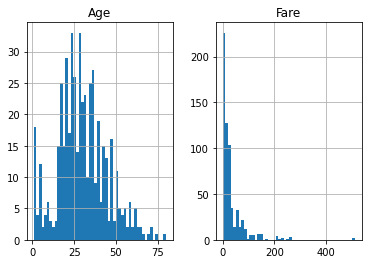

In [10]:

X_train.hist(bins=50)
plt.show()

In [12]:
# first replace with 99
X_train['Age_99'] = X_train['Age'].fillna(99)

# now replace with -1
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train.head(15)

,Age,Fare,Age_99,Age_minus1
857,51.0,26.5500,51.0,51.0
52,49.0,76.7292,49.0,49.0
386,1.0,46.9000,1.0,1.0
124,54.0,77.2875,54.0,54.0
578,NaN,14.4583,99.0,-1.0
549,8.0,36.7500,8.0,8.0
118,24.0,247.5208,24.0,24.0
12,20.0,8.0500,20.0,20.0
157,30.0,8.0500,30.0,30.0
127,24.0,7.1417,24.0,24.0


In [14]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after 99 imputation: ', X_train['Age_99'].var())
print('Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original variable variance:  210.4528692463678
Variance after 99 imputation:  917.6372579490381
Variance after -1 imputation:  319.3288446599537


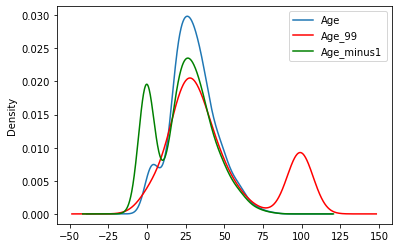

In [16]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
#Corrleation 
X_train[['Fare', 'Age', 'Age_99', 'Age_minus1']].cov()

,Fare,Age,Age_99,Age_minus1
Fare,2328.801583,78.468894,-48.531540,113.205643
Age,78.468894,210.452869,210.452869,210.452869
Age_99,-48.531540,210.452869,917.637258,-165.272555
Age_minus1,113.205643,210.452869,-165.272555,319.328845


<AxesSubplot:>

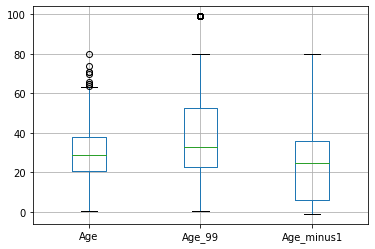

In [21]:
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['Age', 'Age_99', 'Age_minus1']].boxplot()

## Conclusion 
1. It's a quiet manual process as we need to find the right value which should not distort our distribution and create outliers 

2. It also depends on the model which we are using descison tree and random forest model wont be much affected with this.